In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
cd ..

/userdata/jgauthier/projects/ideal-word-representations


In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pathlib import Path
import re
from typing import Union, Callable

from src.utils import concat_csv_with_indices

In [24]:
df = concat_csv_with_indices("outputs/notebooks/librispeech-train-clean-100/**/geometry/analogy/analogy_results.csv",
                        [lambda p: p.parents[2].name,
                         lambda p: p.parents[3].name, lambda p: p.parents[4].name,
                         lambda p: p.parents[5].name],
                        ["equivalence", "model", "base_model", "dataset"]).reset_index()

In [37]:
df["trace"] = df.base_model + "/" + df.model + "/" + df.equivalence

df["evaluation"] = df.prefix.str.extract(r"(\w\d+ .+?)\.txt$")

In [44]:
drop_traces = {
    "w2v2_8/rnn_32-aniso1/word_broad_10frames",
    "w2v2_8/rnn_32-aniso2/word_broad_10frames",
    "w2v2_8/rnn_32-aniso3/word_broad_10frames",
    "w2v2_8/rnn_32-hinge-mAP1/word_broad_10frames",
    "w2v2_8/rnn_32-hinge-mAP2/word_broad_10frames",
    "w2v2_8/rnn_32-hinge-mAP3/word_broad_10frames",
    "w2v2_8/rnn_32-hinge-mAP5/word_broad_10frames",
}

In [45]:
df = df[~df.trace.isin(drop_traces)]

/home/jgauthier/u/transformers/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/jgauthier/u/transformers/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/jgauthier/u/transformers/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/jgauthier/u/tran

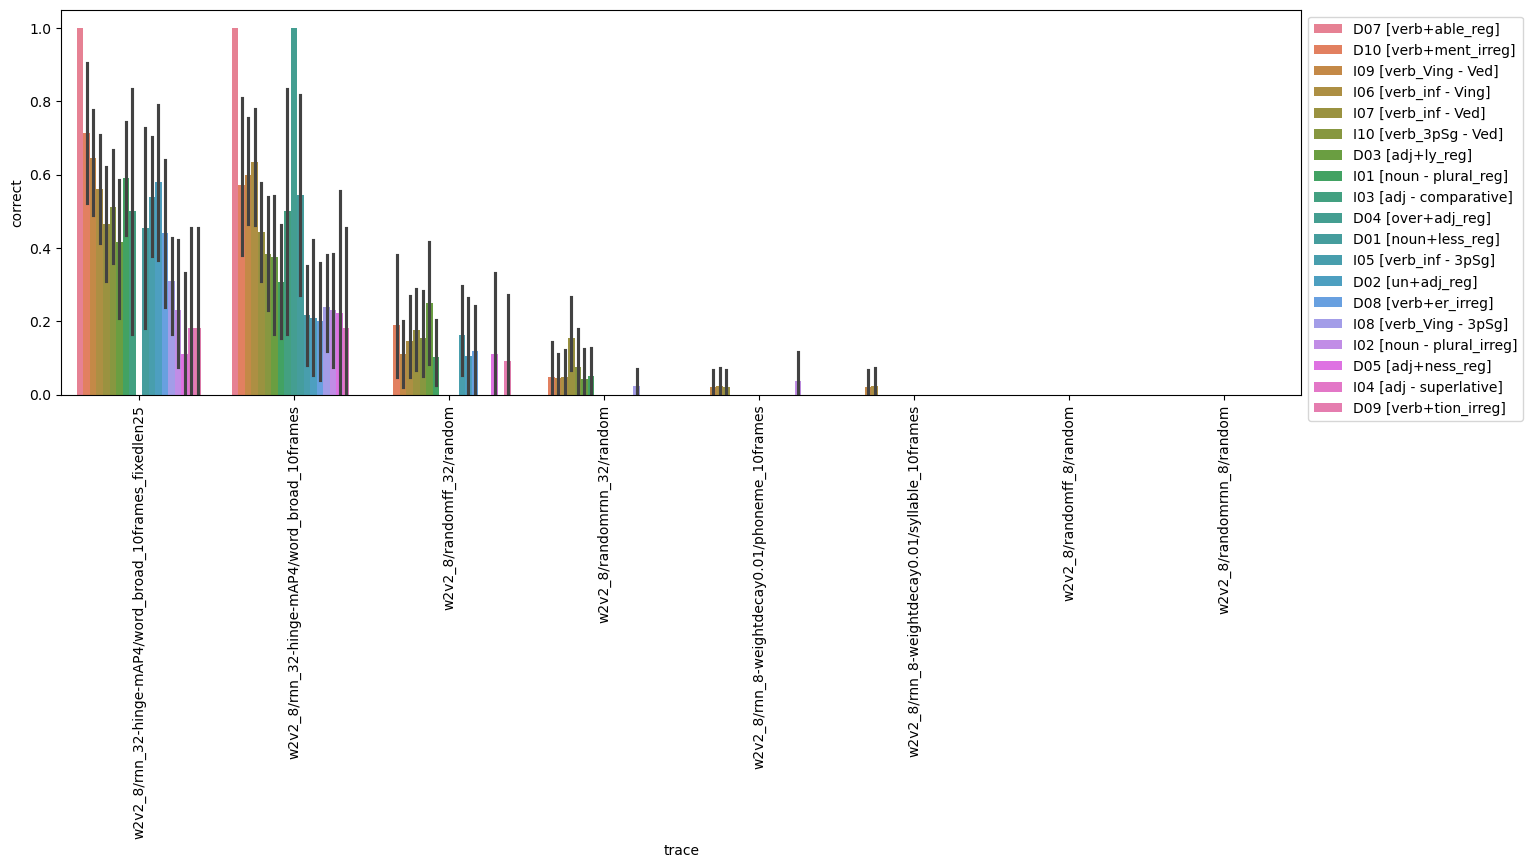

In [52]:
f, ax = plt.subplots(figsize=(16, 5))

ax = sns.barplot(data=df, hue="evaluation", y="correct", x="trace",
                 order=df.groupby("trace").correct.mean().sort_values(ascending=False).index,
                 hue_order=df.groupby("evaluation").correct.mean().sort_values(ascending=False).index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

/home/jgauthier/u/transformers/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/jgauthier/u/transformers/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/jgauthier/u/transformers/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/jgauthier/u/tran

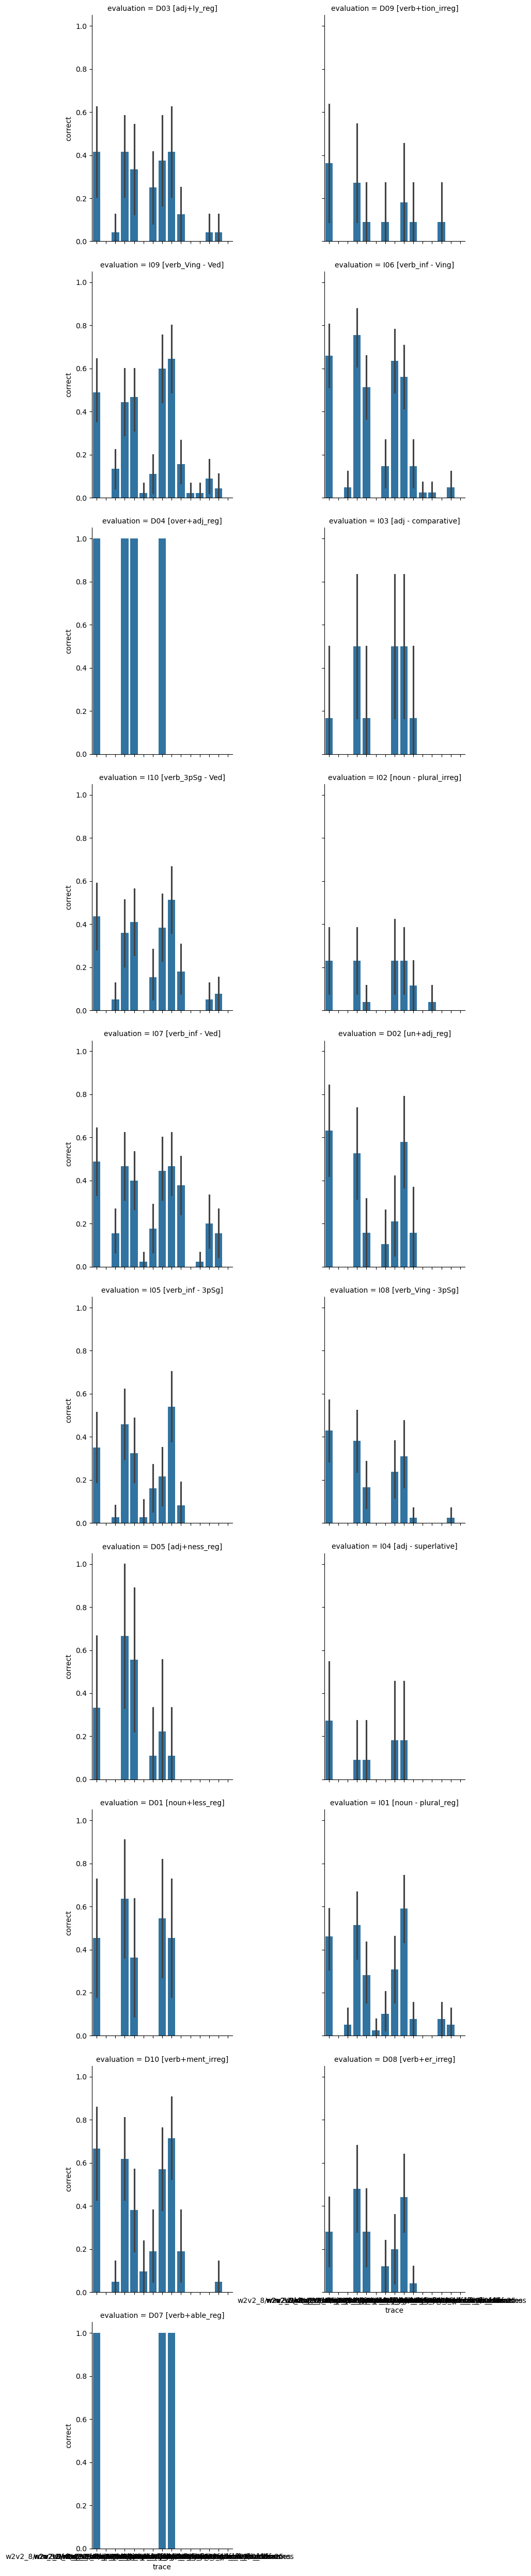

In [38]:
g = sns.catplot(data=df, x="trace", y="correct", col="evaluation", col_wrap=2, kind="bar")